# Linear models: a classic example

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [3]:
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/swiss.csv")
dat.head()


,Region,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [4]:
y = dat.Fertility
x = dat.drop(['Region', 'Fertility'], axis=1)
fit = LinearRegression().fit(x, y)
yhat = fit.predict(x)
[fit.intercept_, fit.coef_]


[66.91518167896871,
 array([-0.17211397, -0.25800824, -0.87094006,  0.10411533,  1.07704814])]

## Example of adjustment effect

In [10]:
fit_marginal = LinearRegression().fit(x['Agriculture'].to_numpy().reshape(-1,1), y)
[fit_marginal.intercept_, fit_marginal.coef_]


[60.304375228005725, array([0.19420175])]

## Adding a useless regressor does what?

In [50]:
x2 = x
x2['Test'] = x2.Agriculture + x2.Examination
fit2 = LinearRegression().fit(x2, y)
yhat2 = fit2.predict(x2)

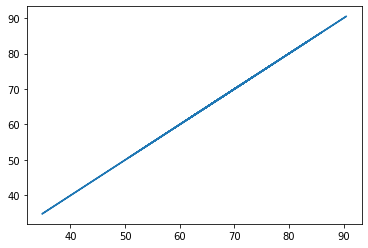

In [51]:
plt.plot(yhat, yhat2);